## Part 1 - Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import re
from bs4 import BeautifulSoup
import pandas as pd       
train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)
unlabeled_train = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3)

In [3]:
print(train.shape)
print(test.shape)
print(unlabeled_train.shape)

print(train['review'].size)
print(test['review'].size)
print(unlabeled_train['review'].size)

(25000, 3)
(25000, 2)
(50000, 2)
25000
25000
50000


In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
test.head()

,id,review
0,"""12311_10""","""Naturally in a film who's main themes are of ..."
1,"""8348_2""","""This movie is a disaster within a disaster fi..."
2,"""5828_4""","""All in all, this is a movie for kids. We saw ..."
3,"""7186_2""","""Afraid of the Dark left me with the impressio..."
4,"""12128_7""","""A very accurate depiction of small time mob l..."


In [6]:
train['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [7]:
from Word2VecUtil import Word2VecUtil

In [8]:
Word2VecUtil.review_to_wordlist(train['review'][0])[:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [9]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
sentences = []
for review in train["review"]:
    sentences += Word2VecUtil.review_to_sentences(
        review, remove_stopwords=False)

In [11]:
for review in unlabeled_train["review"]:
    sentences += Word2VecUtil.review_to_sentences(
        review, remove_stopwords=False)

len(sentences)

795538

In [12]:
sentences[0][:10]

['with', 'all', 'this', 'stuff', 'go', 'down', 'at', 'the', 'moment', 'with']

In [13]:
sentences[1][:10]

['mayb', 'i', 'just', 'want', 'to', 'get', 'a', 'certain', 'insight', 'into']

## Part 2 - Word2Vec

In [14]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                    level=logging.INFO)

In [15]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(sentences, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2020-04-30 11:42:33,953 : INFO : collecting all words and their counts
2020-04-30 11:42:33,954 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-04-30 11:42:33,996 : INFO : PROGRESS: at sentence #10000, processed 225803 words, keeping 12465 word types
2020-04-30 11:42:34,035 : INFO : PROGRESS: at sentence #20000, processed 451892 words, keeping 17070 word types
2020-04-30 11:42:34,080 : INFO : PROGRESS: at sentence #30000, processed 671314 words, keeping 20370 word types
2020-04-30 11:42:34,125 : INFO : PROGRESS: at sentence #40000, processed 897814 words, keeping 23125 word types
2020-04-30 11:42:34,168 : INFO : PROGRESS: at sentence #50000, processed 1116962 words, keeping 25365 word types
2020-04-30 11:42:34,207 : INFO : PROGRESS: at sentence #60000, processed 1338403 words, keeping 27283 word types
2020-04-30 11:42:34,251 : INFO : PROGRESS: at sentence #70000, processed 1561579 words, keeping 29024 word types
2020-04-30 11:42:34,290 : INFO : PROGRESS: 

2020-04-30 11:42:37,062 : INFO : PROGRESS: at sentence #720000, processed 16105658 words, keeping 83036 word types
2020-04-30 11:42:37,106 : INFO : PROGRESS: at sentence #730000, processed 16332039 words, keeping 83571 word types
2020-04-30 11:42:37,145 : INFO : PROGRESS: at sentence #740000, processed 16553072 words, keeping 84127 word types
2020-04-30 11:42:37,187 : INFO : PROGRESS: at sentence #750000, processed 16771399 words, keeping 84599 word types
2020-04-30 11:42:37,226 : INFO : PROGRESS: at sentence #760000, processed 16990803 words, keeping 85068 word types
2020-04-30 11:42:37,270 : INFO : PROGRESS: at sentence #770000, processed 17217940 words, keeping 85644 word types
2020-04-30 11:42:37,310 : INFO : PROGRESS: at sentence #780000, processed 17448086 words, keeping 86160 word types
2020-04-30 11:42:37,353 : INFO : PROGRESS: at sentence #790000, processed 17675162 words, keeping 86665 word types
2020-04-30 11:42:37,375 : INFO : collected 86996 word types from a corpus of 177

2020-04-30 11:43:21,206 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-04-30 11:43:21,217 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-04-30 11:43:21,220 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-04-30 11:43:21,220 : INFO : EPOCH - 4 : training on 17798263 raw words (12871298 effective words) took 10.8s, 1195048 effective words/s
2020-04-30 11:43:22,226 : INFO : EPOCH 5 - PROGRESS: at 9.29% examples, 1190461 words/s, in_qsize 7, out_qsize 0
2020-04-30 11:43:23,230 : INFO : EPOCH 5 - PROGRESS: at 18.87% examples, 1203857 words/s, in_qsize 7, out_qsize 0
2020-04-30 11:43:24,230 : INFO : EPOCH 5 - PROGRESS: at 28.26% examples, 1204309 words/s, in_qsize 7, out_qsize 0
2020-04-30 11:43:25,232 : INFO : EPOCH 5 - PROGRESS: at 37.68% examples, 1203691 words/s, in_qsize 7, out_qsize 0
2020-04-30 11:43:26,235 : INFO : EPOCH 5 - PROGRESS: at 46.99% examples, 1203270 words/s, in_qsize 7, out_qsize 0
2020-04-30 11:43:

In [16]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2020-04-30 11:43:31,972 : INFO : precomputing L2-norms of word weight vectors
2020-04-30 11:43:31,990 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2020-04-30 11:43:31,991 : INFO : not storing attribute vectors_norm
2020-04-30 11:43:31,992 : INFO : not storing attribute cum_table
2020-04-30 11:43:32,352 : INFO : saved 300features_40minwords_10text


## 모델 결과 탐색

In [17]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('man woman child kitchen'.split())

'kitchen'

In [18]:
model.wv.doesnt_match("france england germany berlin".split())

2020-04-30 11:43:32,467 : WARNING : vectors for words {'france', 'germany'} are not present in the model, ignoring these words


'berlin'

In [19]:
# 가장 유사한 단어를 추출
model.wv.most_similar("man")

[('woman', 0.6315714120864868),
 ('lad', 0.5368717908859253),
 ('ladi', 0.5339914560317993),
 ('millionair', 0.5298746824264526),
 ('businessman', 0.4834316372871399),
 ('loner', 0.4766874313354492),
 ('men', 0.4758791923522949),
 ('farmer', 0.4659486711025238),
 ('priest', 0.44995445013046265),
 ('doctor', 0.44906073808670044)]

In [20]:
model.wv.most_similar("queen")

[('princess', 0.5935186743736267),
 ('madam', 0.5624127984046936),
 ('stepmoth', 0.5624097585678101),
 ('latifah', 0.5462210178375244),
 ('goddess', 0.5456069707870483),
 ('dame', 0.5450755953788757),
 ('victoria', 0.5328841209411621),
 ('eva', 0.5270711183547974),
 ('katherin', 0.5252182483673096),
 ('regina', 0.5170784592628479)]

In [21]:
model.wv.most_similar("film")

[('movi', 0.8576011657714844),
 ('flick', 0.6092103719711304),
 ('documentari', 0.569693922996521),
 ('pictur', 0.5444467067718506),
 ('cinema', 0.5202536582946777),
 ('masterpiec', 0.5113654136657715),
 ('it', 0.49714308977127075),
 ('sequel', 0.484423965215683),
 ('thriller', 0.4827079772949219),
 ('genr', 0.4754331707954407)]

In [22]:
#model.wv.most_similar("happy")
model.wv.most_similar("happi") # stemming 처리 시 

[('unhappi', 0.4348684251308441),
 ('happier', 0.4283265769481659),
 ('satisfi', 0.3938177227973938),
 ('lucki', 0.3899717926979065),
 ('sad', 0.38729146122932434),
 ('joy', 0.38692447543144226),
 ('upset', 0.3819395899772644),
 ('comfort', 0.3815908432006836),
 ('glad', 0.3805704116821289),
 ('destin', 0.3712562918663025)]

### Word2Vec으로 벡터화 한 단어를 t-SNE 를 통해 시각화

In [23]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2020-04-30 11:43:34,167 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2020-04-30 11:43:34,391 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2020-04-30 11:43:34,392 : INFO : setting ignored attribute vectors_norm to None
2020-04-30 11:43:34,392 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2020-04-30 11:43:34,393 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2020-04-30 11:43:34,393 : INFO : setting ignored attribute cum_table to None
2020-04-30 11:43:34,394 : INFO : loaded 300features_40minwords_10text


11986
[-0.05660335  0.09604523 -0.04189643  0.06643839 -0.15439409  0.00326813
 -0.06386708  0.00521186  0.05352144  0.06197174]


In [24]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [25]:
df.head(10)

,x,y
with,-6.002683,-0.139118
all,2.736715,-3.932211
this,1.140771,-2.905778
stuff,-2.829664,-3.057104
go,4.109568,1.437917
down,-8.427856,2.122262
at,-6.340227,2.139363
the,3.532516,-5.103611
moment,-2.788552,-8.775926
mj,-7.959677,-5.929700


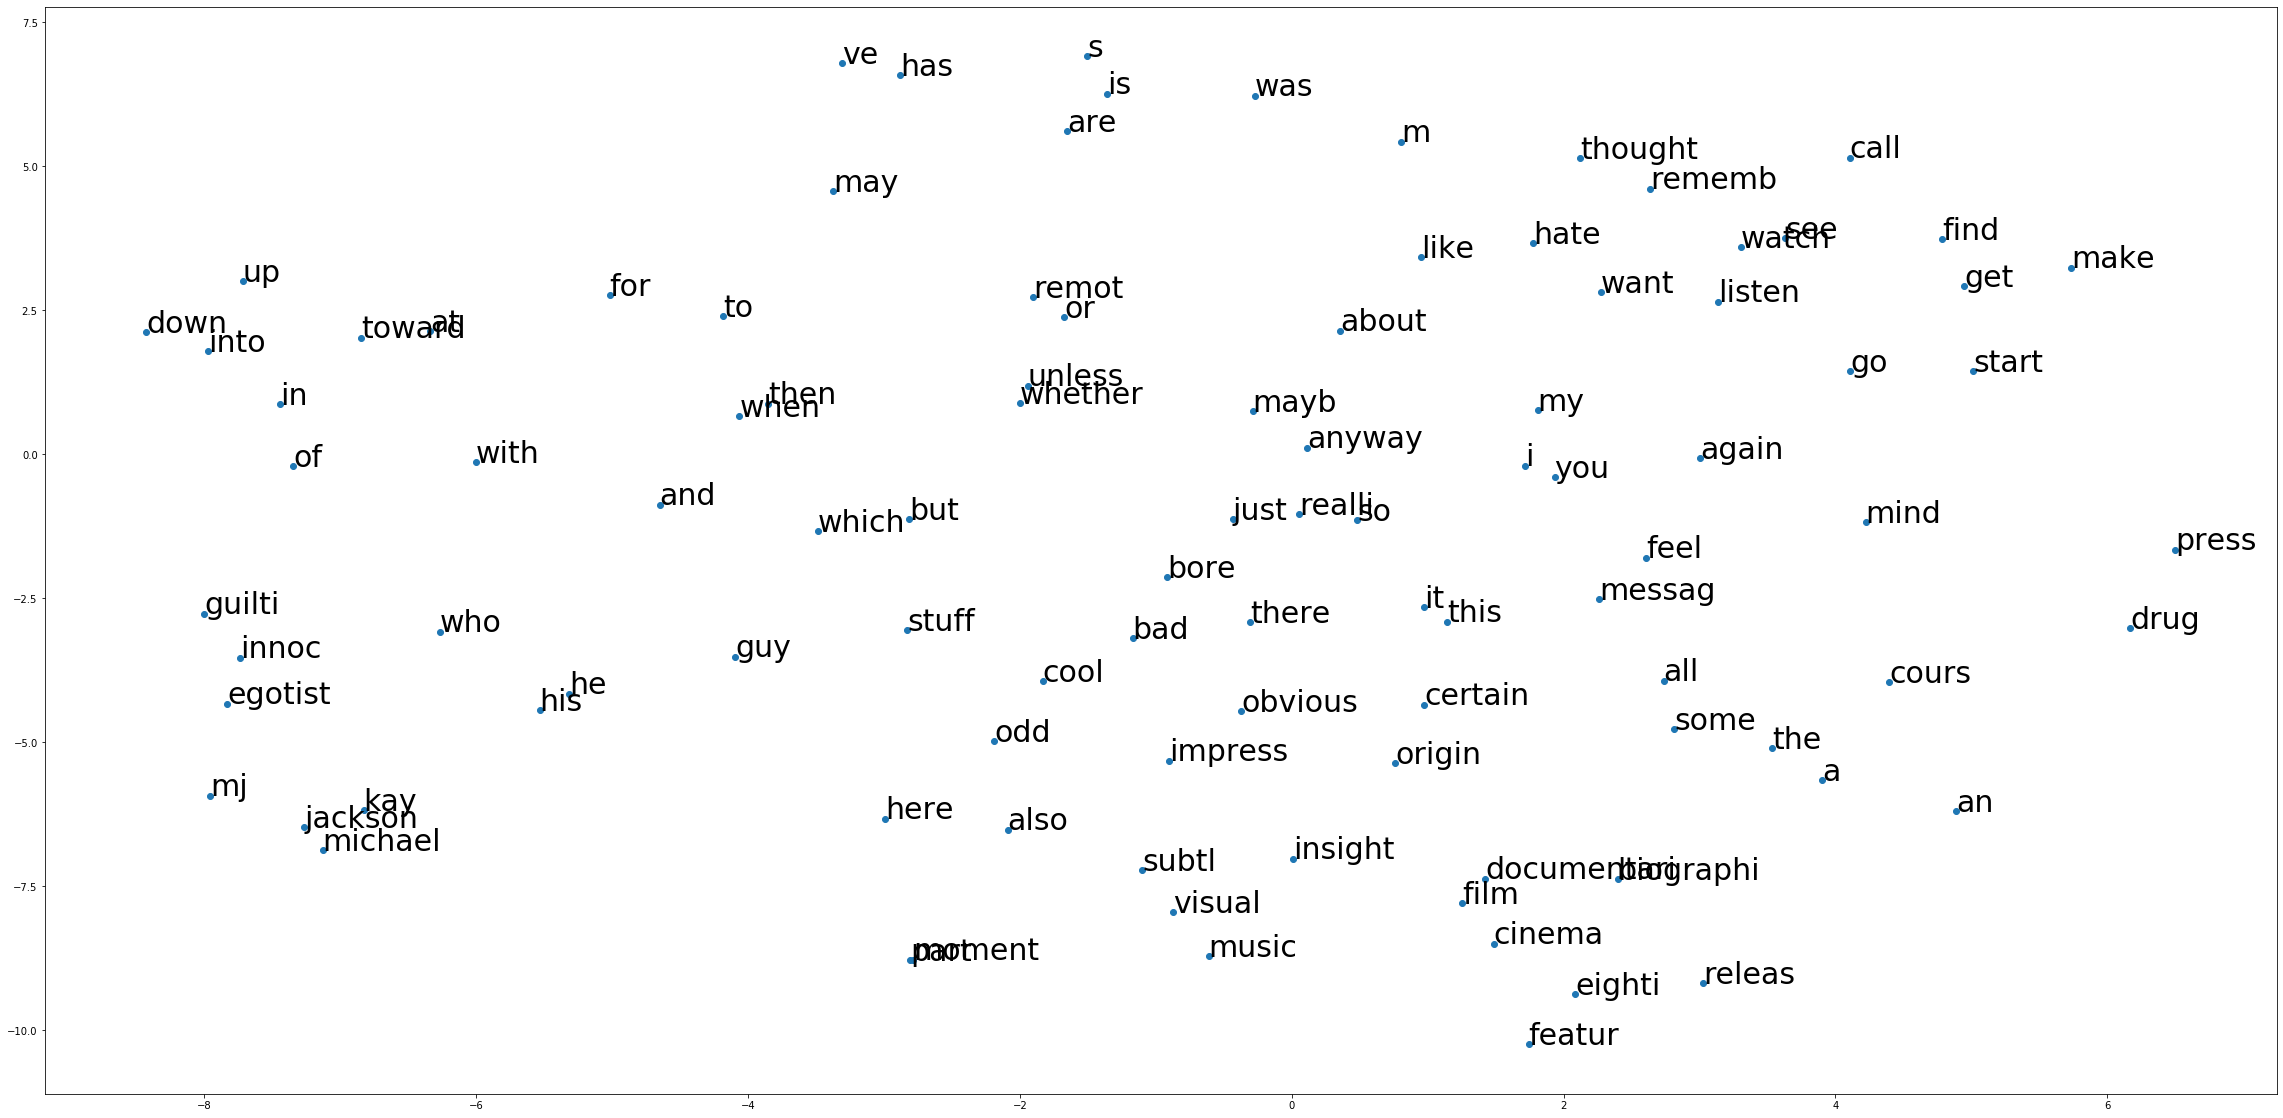

In [26]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

In [27]:
import numpy as np

def makeFeatureVec(words, model, num_features):
    """
    주어진 문장에서 단어 벡터의 평균을 구하는 함수
    """
    # 속도를 위해 0으로 채운 배열로 초기화 한다.
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    # Index2word는 모델의 사전에 있는 단어명을 담은 리스트이다.
    # 속도를 위해 set 형태로 초기화 한다.
    index2word_set = set(model.wv.index2word)
    # 루프를 돌며 모델 사전에 포함이 되는 단어라면 피처에 추가한다.
    for word in words:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 결과를 단어수로 나누어 평균을 구한다.
    featureVec = np.divide(featureVec,nwords)
    return featureVec

In [28]:
def getAvgFeatureVecs(reviews, model, num_features):
    # 리뷰 단어 목록의 각각에 대한 평균 feature 벡터를 계산하고 
    # 2D numpy 배열을 반환한다.
    
    # 카운터를 초기화 한다.
    counter = 0.
    # 속도를 위해 2D 넘파이 배열을 미리 할당한다.
    reviewFeatureVecs = np.zeros(
        (len(reviews),num_features),dtype="float32")
    
    for review in reviews:
       # 매 1000개 리뷰마다 상태를 출력
        if counter%1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
       # 평균 피처 벡터를 만들기 위해 위에서 정의한 함수를 호출한다.
        reviewFeatureVecs[int(counter)] = makeFeatureVec(review, model, \
           num_features)
       # 카운터를 증가시킨다.
        counter = counter + 1.
    return reviewFeatureVecs

In [29]:
# 멀티스레드로 4개의 워커를 사용해 처리한다.
def getCleanReviews(reviews):
    clean_reviews = []
    clean_reviews = Word2VecUtil.apply_by_multiprocessing(\
        reviews["review"], Word2VecUtil.review_to_wordlist,\
        workers=4)
    return clean_reviews

In [30]:
%time trainDataVecs = getAvgFeatureVecs(\
    getCleanReviews(train), model, num_features ) 

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 16s


In [31]:
%time testDataVecs = getAvgFeatureVecs(\
        getCleanReviews(test), model, num_features )

Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Wall time: 1min 15s


### 모델 생성

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
    n_estimators = 100, n_jobs = -1, random_state=2018)

In [33]:
%time forest = forest.fit( trainDataVecs, train["sentiment"] )

Wall time: 6.85 s


In [34]:
from sklearn.model_selection import cross_val_score
%time score = np.mean(cross_val_score(\
    forest, trainDataVecs, \
    train['sentiment'], cv=10, scoring='roc_auc'))

Wall time: 1min 7s


In [35]:
score

0.9066586240000001

### Test

In [36]:
result = forest.predict( testDataVecs )

In [37]:
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )
output.to_csv('Word2Vec_AverageVectors_{0:.5f}.csv'.format(score), 
              index=False, quoting=3 )

In [38]:
output_sentiment = output['sentiment'].value_counts()
print(output_sentiment[0] - output_sentiment[1])
output_sentiment

32


0    12516
1    12484
Name: sentiment, dtype: int64

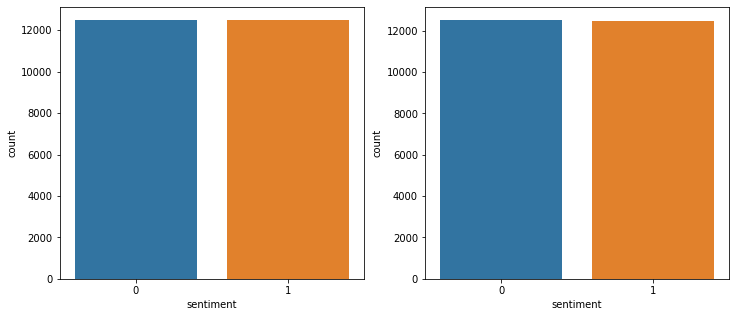

In [39]:
import seaborn as sns 
%matplotlib inline

fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.countplot(train['sentiment'], ax=axes[0])
sns.countplot(output['sentiment'], ax=axes[1])